
🔹 Subscription Analysis:
               User Email         Platform           Transaction ID  Duration  \
0  tanuja.ch076@gmail.com  Spotify Premium     2514627604391107-1-1  3 months   
1  tanuja.ch076@gmail.com  Spotify Premium     2514627604391107-1-1  3 months   
2  tanuja.ch076@gmail.com  Spotify Premium     2514627604391107-1-1  3 months   
3  tanuja.ch076@gmail.com  Spotify Premium     2514627604391107-1-1  3 months   
4  tanuja.ch076@gmail.com  Swiggy One Lite          201676922559871       NaN   
5  tanuja.ch076@gmail.com          Netflix  C21E2-1A863-8FF45-180A6       NaN   
6  tanuja.ch076@gmail.com          Netflix  C21E2-1A863-8FF45-180A6       NaN   

   Total (INR) Date of Email  Usage  Cost per Hour      Recommendation  
0          0.0          59.0     50       0.000000  Consider Downgrade  
1         59.0           NaN     50       1.180000  Consider Downgrade  
2         59.0           NaN      0      59.000000              Cancel  
3         59.0           NaN     

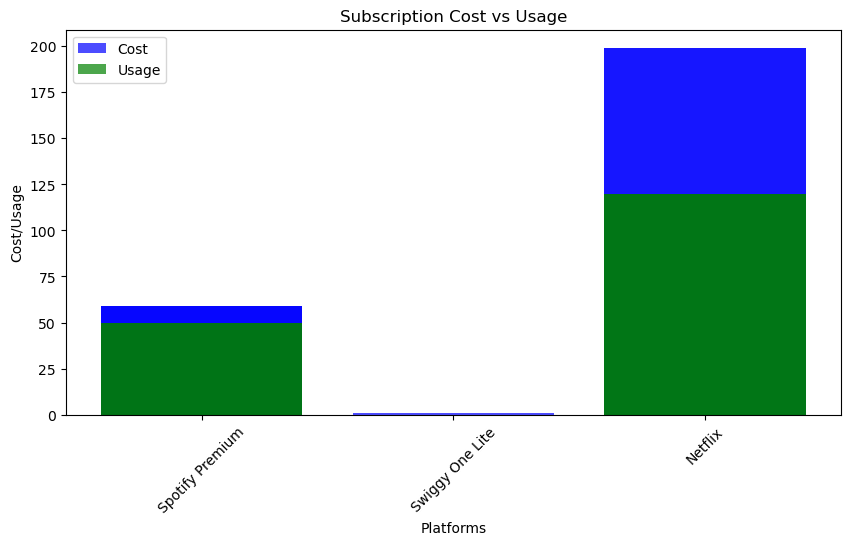


📄 Report saved as 'subscription_report.csv'


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load Extracted Data
df = pd.read_csv("subscription_details.csv")  # Replace with actual extracted data file

# 🔹 Data Cleaning
df["Total (INR)"] = pd.to_numeric(df["Total (INR)"], errors="coerce")  # Convert, setting invalids to NaN
df["Usage"] = pd.to_numeric(df["Usage"], errors="coerce")  # Convert, setting invalids to NaN
df.fillna({"Total (INR)": 0, "Usage": 1}, inplace=True)  # Replace NaN costs with 0, and avoid division by zero

# 🔹 Cost Per Hour Calculation
df["Cost per Hour"] = df["Total (INR)"] / df["Usage"].replace(0, 1)

# 🔹 Categorization Based on Usage
def categorize_subscription(usage):
    if usage < 5:
        return "Cancel"
    elif 5 <= usage < 65:
        return "Consider Downgrade"
    else:
        return "Keep"

df["Recommendation"] = df["Usage"].apply(categorize_subscription)

# 🔹 Display Analysis
print("\n🔹 Subscription Analysis:")
print(df)

# 🔹 Generate Insights
print("\n💡 Recommendations:")
print(df[["Platform", "Total (INR)", "Usage", "Recommendation"]])

# 🔹 Visualization
plt.figure(figsize=(10, 5))
plt.bar(df["Platform"], df["Total (INR)"], color="blue", alpha=0.7, label="Cost")
plt.bar(df["Platform"], df["Usage"], color="green", alpha=0.7, label="Usage")
plt.xlabel("Platforms")
plt.ylabel("Cost/Usage")
plt.legend()
plt.title("Subscription Cost vs Usage")
plt.xticks(rotation=45)
plt.show()

# 🔹 Export Report
df.to_csv("subscription_report.csv", index=False)
print("\n📄 Report saved as 'subscription_report.csv'")
